In [2]:
#%load_ext autoreload
#%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# basic functionalities
import re
import os
import sys
import datetime
import itertools
import math 

# data transforamtion and manipulation
import pandas as pd
import pandas_datareader.data as web
import numpy as np
# prevent crazy long pandas prints
pd.options.display.max_columns = 16
pd.options.display.max_rows = 16
pd.set_option('display.float_format', lambda x: '%.5f' % x)
np.set_printoptions(precision=5, suppress=True)

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# initial plotting and plot styling libraries (will be overriden)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


# jupyter wdgets
from ipywidgets import interactive, widgets, RadioButtons, ToggleButtons, Select, FloatSlider, FloatProgress
from IPython.display import set_matplotlib_formats, Image


# JUPYTER THEME OVERRIDES
from jupyterthemes import jtplot
# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='chesterish')
# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['figure.figsize'] = (16, 10)
# recet to matplotlib standards
#jtplot.reset()

#Direct input 
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 11,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

# MATPLOTLIB OVERRIDES
# articles tyle plots
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern,amsmath,amsthm,verbatim,amssymb,amsfonts,amscd,}"]
#Options
params = {'text.usetex' : True,
          'font.size' : 12,
          'font.family' : 'lmodern',
          'text.latex.unicode': True,
          }
plt.rcParams.update(params) 

plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 3.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 16

# Normal distribution

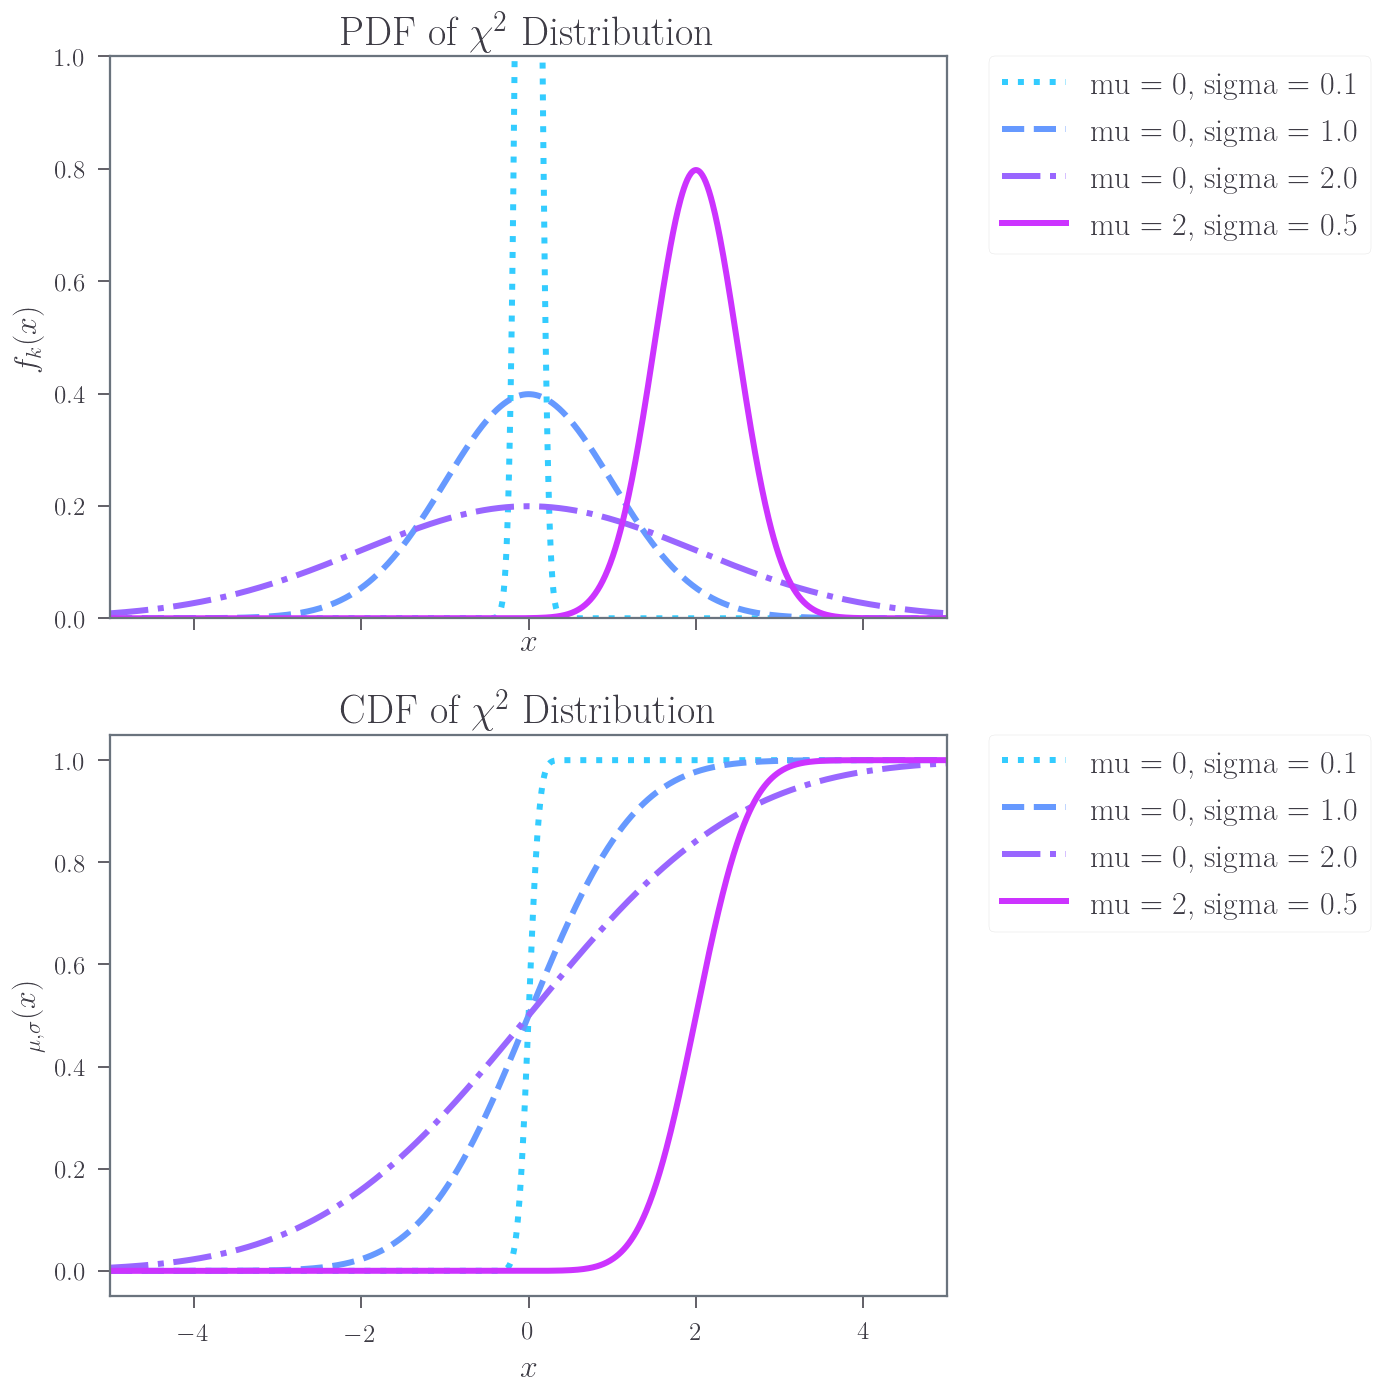

In [4]:
from scipy import stats
import matplotlib as mpl

x = np.linspace(-5, 5, 1000)
fig, ax = plt.subplots(2, sharex=True, figsize=(10,10))


linestyles = [':', '--', '-.', '-']
mus = [0, 0, 0, 2]
sigmas = [0.1, 1.0, 2.0, 0.5]

# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
cmap = mpl.cm.get_cmap('cool')
colors = [cmap(0.2), cmap(0.4), cmap(0.6), cmap(0.8)]

for ls, c, mu, sigma in zip(linestyles, colors, mus, sigmas):
    ax[0].plot(x, stats.norm.pdf(x, mu, sigma), linestyle=ls, c=c, label=r'mu = {}, sigma = {}'.format(mu, sigma))
    ax[1].plot(x, stats.norm.cdf(x, mu, sigma), linestyle=ls, c=c, label=r'mu = {}, sigma = {}'.format(mu, sigma))

ax[0].set_xlim(-5, 5)
ax[0].set_ylim(0, 1)
ax[0].set_title('PDF of the NOrmal Distribution')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel(r'$f_{\mu,\sigma}(x)$')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel(r'$F_{\mu,\sigma}(x)$')
ax[1].set_title('CDF of the Normal Distribution')

plt.savefig('..\img\chi2.pdf')
plt.tight_layout()
plt.show()

# $\chi^2$-Distribution

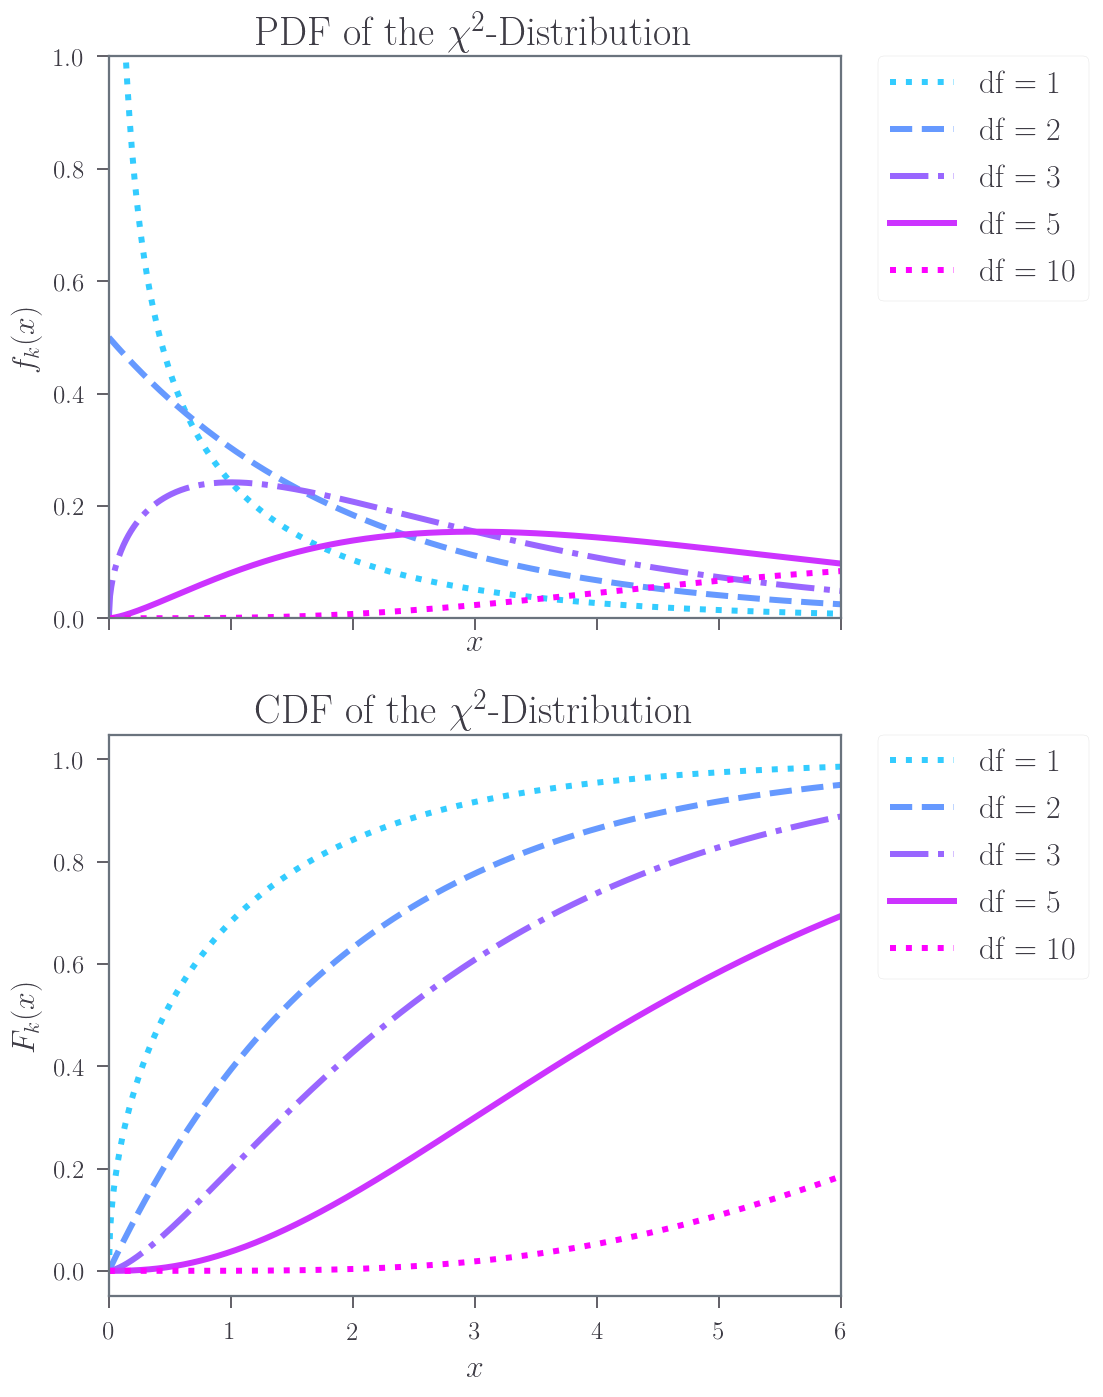

In [5]:
from scipy import stats
import matplotlib as mpl

x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots(2, sharex=True, figsize=(8,10))


linestyles = [':', '--', '-.', '-', ':']
deg_of_freedom = [1, 2, 3, 5, 10]

# https://stackoverflow.com/questions/25408393/getting-individual-colors-from-a-color-map-in-matplotlib
cmap = mpl.cm.get_cmap('cool')
colors = [cmap(0.2), cmap(0.4), cmap(0.6), cmap(0.8), cmap(0.99)]

for df, ls, c in zip(deg_of_freedom, linestyles, colors):
    ax[0].plot(x, stats.chi2.pdf(x, df), linestyle=ls, c=c, label=r'df = {}'.format(df))
    ax[1].plot(x, stats.chi2.cdf(x, df), linestyle=ls, c=c, label=r'df = {}'.format(df))

ax[0].set_xlim(0, 6)
ax[0].set_ylim(0, 1)
ax[0].set_title('PDF of the $\chi^2$-Distribution')
ax[0].set_xlabel('$x$')
ax[0].set_ylabel(r'$f_k(x)$')
ax[0].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax[1].legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax[1].set_xlabel('$x$')
ax[1].set_ylabel(r'$F_k(x)$')
ax[1].set_title('CDF of the $\chi^2$-Distribution')

plt.savefig('..\img\chi2.pdf')
plt.tight_layout()
plt.show()